In [15]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import string
import re

In [2]:
#! pip install sqlalchemy

In [3]:
#! pip install pymysql

In [187]:
# Create a database in your mysql Workbench named "badpress", execute sql code I provided to create all the tables

In [16]:
#Create an engine and keep the proper encoding of the characters
from sqlalchemy import create_engine
engine = create_engine('mysql+pymysql://root@localhost/badpress?charset=utf8',encoding = 'utf-8')

## Populate SOURCE table with the data 

In [17]:
source=DataFrame(columns=["id", "name", "URL_logo"])

source1=pd.DataFrame([[1, "CNN", "http://www.logospike.com/wp-content/uploads/2014/11/Cnn_logo-2.png"],
                      [2, "FoxNews", "https://upload.wikimedia.org/wikipedia/commons/d/d4/Fox_News_Channel_logo.png"],
                      [3, "New York Times", "http://1000logos.net/wp-content/uploads/2017/04/Logo-New-York-Times.jpg"]],columns=["id", "name", "URL_logo"])

source=source.append(source1)

In [7]:
source.to_sql(name="source", con=engine, flavor=None, schema=None, if_exists='append', index=False, index_label=None, chunksize=None, dtype=None)

IntegrityError: (pymysql.err.IntegrityError) (1062, "Duplicate entry '1' for key 'PRIMARY'") [SQL: 'INSERT INTO source (id, name, `URL_logo`) VALUES (%(id)s, %(name)s, %(URL_logo)s)'] [parameters: ({'id': 1, 'name': 'CNN', 'URL_logo': 'http://www.logospike.com/wp-content/uploads/2014/11/Cnn_logo-2.png'}, {'id': 2, 'name': 'FoxNews', 'URL_logo': 'https://upload.wikimedia.org/wikipedia/commons/d/d4/Fox_News_Channel_logo.png'}, {'id': 3, 'name': 'New York Times', 'URL_logo': 'http://1000logos.net/wp-content/uploads/2017/04/Logo-New-York-Times.jpg'})] (Background on this error at: http://sqlalche.me/e/gkpj)

## Populate STATE table with the data 

In [3]:
state=DataFrame(columns=["id", "name", "URL_flag","primaries_date"])

state1=pd.DataFrame([[1, "West Virginia", "https://www.united-states-flag.com/media/catalog/product/cache/2/image/9df78eab33525d08d6e5fb8d27136e95/w/e/westvirginia-nylon_1.jpg", "May 8 2018"],
                     [2, "Virginia", "https://www.50states.com/images/redesign/flags/va-largeflag.png", "June 12 2018"],
                     [3, "Texas", "https://en.wikipedia.org/wiki/Flag_of_Texas#/media/File:Flag_of_Texas.svg", "NA"]], 
                    columns=["id", "name", "URL_flag","primaries_date" ])

state=state.append(state1)

In [12]:
state.to_sql(name="state", con=engine, flavor=None, schema=None, if_exists='append', index=False, index_label=None, chunksize=None, dtype=None)

IntegrityError: (pymysql.err.IntegrityError) (1062, "Duplicate entry '1' for key 'PRIMARY'") [SQL: 'INSERT INTO state (id, name, `URL_flag`, primaries_date) VALUES (%(id)s, %(name)s, %(URL_flag)s, %(primaries_date)s)'] [parameters: {'id': 1, 'name': 'West Virginia', 'URL_flag': 'https://www.united-states-flag.com/media/catalog/product/cache/2/image/9df78eab33525d08d6e5fb8d27136e95/w/e/westvirginia-nylon_1.jpg', 'primaries_date': 'May 8 2018'}] (Background on this error at: http://sqlalche.me/e/gkpj)

## Populate ISSUE table with the data 

In [4]:
issue=DataFrame(columns=["id", "name","info","URL_logo"])

issue1=pd.DataFrame([[1, "Gun Law", "Gun laws in the United States regulate the sale, possession, and use of firearms and ammunition. State laws (and the laws of Washington, D.C. and the U.S. territories) vary considerably, and are independent of existing federal firearms laws, although they are sometimes broader or more limited in scope than the federal laws. State level laws vary significantly in their form, content, and level of restriction. Forty-four states have a provision in their state constitutions similar to the Second Amendment to the U.S. Constitution, which protects the right to keep and bear arms. The exceptions are California, Iowa, Maryland, Minnesota, New Jersey, and New York. In New York, however, the statutory civil rights laws contain a provision virtually identical to the Second Amendment. Additionally, the U.S. Supreme Court held in McDonald v. Chicago that the protections of the Second Amendment to keep and bear arms for self-defense in one's home apply against state governments and their political subdivisions.", "https://cdn.cltampa.com/files/base/scomm/cltampa/image/2018/03/640w/gun_law.5aa311dbc246a.jpg"],
                     [2, "Immigration","Immigration is the international movement of people into a destination country of which they are not natives or where they do not possess citizenship in order to settle or reside there, especially as permanent residents or naturalized citizens, or to take-up employment as a migrant worker or temporarily as a foreign worker.As for economic effects, research suggests that migration is beneficial both to the receiving and sending countries. Research, with few exceptions, finds that immigration on average has positive economic effects on the native population, but is mixed as to whether low-skilled immigration adversely affects low-skilled natives. Studies show that the elimination of barriers to migration would have profound effects on world GDP, with estimates of gains ranging between 67 and 147 percent. Development economists argue that reducing barriers to labor mobility between developing countries and developed countries would be one of the most efficient tools of poverty reduction." ,"http://toledocitypaper.com/wp-content/uploads/2017/03/immigrants-toledo-refugees-protest.jpg"],
                     [3, "Foreign Policy", "A country's foreign policy, also called foreign relations or foreign affairs policy, consists of self-interest strategies chosen by the state to safeguard its national interests and to achieve goals within its international relations milieu. The approaches are strategically employed to interact with other countries. The study of such strategies is called foreign policy analysis. In recent times, due to the deepening level of globalization and transnational activities, the states will also have to interact with non-state actors. The aforementioned interaction is evaluated and monitored in attempts to maximize benefits of multilateral international cooperation. Since the national interests are paramount, foreign policies are designed by the government through high-level decision making processes. National interests accomplishment can occur as a result of peaceful cooperation with other nations, or through exploitation. Usually, creating foreign policy is the job of the head of government and the foreign minister (or equivalent).", "https://bacon.house.gov/sites/bacon.house.gov/files/styles/congress_featured_image/public/featured_image/issues/Foreign%20Policy.png?itok=UVYCCIOO"],
                     [4, "Economy", "An economy is an area of the production, distribution, or trade[1], and consumption of goods and services by different agents. Understood in its broadest sense, 'The economy is defined as a social domain that emphasizes the practices, discourses, and material expressions associated with the production, use, and management of resources'.[2] Economic agents can be individuals, businesses, organizations, or governments. Economic transactions occur when two parties agree to the value or price of the transacted good or service, commonly expressed in a certain currency. However, monetary transactions only account for a small part of the economic domain. Economic activity is spurred by production which uses natural resources, labor, and capital. It has changed over time due to technology (automation, accelerator of process, reduction of cost functions), innovation (new products, services, processes, new markets, expanding markets, diversification of markets, niche markets, increases revenue functions) such as, that which produces intellectual property and changes in industrial relations (for example, child labor being replaced in some parts of the world with universal access to education).", "http://media.al.com/news_impact/photo/economy-2014jpg-886912a5cd9c9100.jpg"],
                     [5, "Crime", "In ordinary language, a crime is an unlawful act punishable by a state or other authority. The term crime does not, in modern criminal law, have any simple and universally accepted definition, though statutory definitions have been provided for certain purposes.The most popular view is that crime is a category created by law; in other words, something is a crime if declared as such by the relevant and applicable law.One proposed definition is that a crime or offence (or criminal offence) is an act harmful not only to some individual but also to a community, society or the state (a public wrong). Such acts are forbidden and punishable by law.", "https://www.brennancenter.org/sites/default/files/styles/individual_node_page/public/blog/crime%20cuffs.jpg?itok=WP0o5xht"]] ,
                    columns=["id", "name", "info","URL_logo" ])


issue=issue.append(issue1)

In [17]:
issue.to_sql(name="issue", con=engine, flavor=None, schema=None, if_exists='append', index=False, index_label=None, chunksize=None, dtype=None)

IntegrityError: (pymysql.err.IntegrityError) (1062, "Duplicate entry '1' for key 'PRIMARY'") [SQL: 'INSERT INTO issue (id, name, info, `URL_logo`) VALUES (%(id)s, %(name)s, %(info)s, %(URL_logo)s)'] [parameters: ({'id': 1, 'name': 'Gun Law', 'info': "Gun laws in the United States regulate the sale, possession, and use of firearms and ammunition. State laws (and the laws of Washington, D.C. and the ... (715 characters truncated) ... ctions of the Second Amendment to keep and bear arms for self-defense in one's home apply against state governments and their political subdivisions.", 'URL_logo': 'https://cdn.cltampa.com/files/base/scomm/cltampa/image/2018/03/640w/gun_law.5aa311dbc246a.jpg'}, {'id': 2, 'name': 'Immigration', 'info': 'Immigration is the international movement of people into a destination country of which they are not natives or where they do not possess citizenship ... (701 characters truncated) ... ducing barriers to labor mobility between developing countries and developed countries would be one of the most efficient tools of poverty reduction.', 'URL_logo': 'http://toledocitypaper.com/wp-content/uploads/2017/03/immigrants-toledo-refugees-protest.jpg'}, {'id': 3, 'name': 'Foreign Policy', 'info': "A country's foreign policy, also called foreign relations or foreign affairs policy, consists of self-interest strategies chosen by the state to safe ... (744 characters truncated) ... her nations, or through exploitation. Usually, creating foreign policy is the job of the head of government and the foreign minister (or equivalent).", 'URL_logo': 'https://bacon.house.gov/sites/bacon.house.gov/files/styles/congress_featured_image/public/featured_image/issues/Foreign%20Policy.png?itok=UVYCCIOO'}, {'id': 4, 'name': 'Economy', 'info': "An economy is an area of the production, distribution, or trade[1], and consumption of goods and services by different agents. Understood in its broa ... (903 characters truncated) ... property and changes in industrial relations (for example, child labor being replaced in some parts of the world with universal access to education).", 'URL_logo': 'http://media.al.com/news_impact/photo/economy-2014jpg-886912a5cd9c9100.jpg'}, {'id': 5, 'name': 'Crime', 'info': 'In ordinary language, a crime is an unlawful act punishable by a state or other authority. The term crime does not, in modern criminal law, have any  ... (351 characters truncated) ... ct harmful not only to some individual but also to a community, society or the state (a public wrong). Such acts are forbidden and punishable by law.', 'URL_logo': 'https://www.brennancenter.org/sites/default/files/styles/individual_node_page/public/blog/crime%20cuffs.jpg?itok=WP0o5xht'})] (Background on this error at: http://sqlalche.me/e/gkpj)

## Populate first table CANDIDATE with the data 

In [18]:
CREATE TABLE candidate(
	id INT NOT NULL,
	name VARCHAR(70),
	state_fk INT,
	date_birth VARCHAR(30),
	place_birth VARCHAR(100),
	position VARCHAR(100),
	URL_photo VARCHAR(250),
    party VARCHAR(20),
	score_issue_1 FLOAT,
	score_issue_2 FLOAT,
	score_issue_3 FLOAT,
	score_issue_4 FLOAT,
	score_issue_5 FLOAT,	
	PRIMARY KEY(id),
	FOREIGN KEY(state_fk) REFERENCES state(id)

SyntaxError: invalid syntax (<ipython-input-18-f3a4c3edddc6>, line 1)

In [5]:
candidate=DataFrame(columns=["id", "name","state_fk","date_birth", "place_birth", "position", "URL_photo", "party"])

candidate1=pd.DataFrame([[1, "Don Blankenship",1, "March 14, 1950", "Stopover, Kentucky", "Coal magnate", "https://i2.wp.com/woay.tv/wp-content/uploads/2017/05/GTY_don_blankenship_jt_160406_4x3_992.jpg?resize=735%2C400&ssl=1","Republican" ],
                     [2, "Bo Copley",1, "", " Dingess, West Virginia", "","https://heavyeditorial.files.wordpress.com/2017/05/bo-copley-e1494012597984.jpg?quality=65&strip=all&w=780&strip=all","Republican" ],
                     [3, "Evan Jenkins",1, "September 12, 1960", "Huntington, West Virginia","U.S. House of Representatives","https://www.congress.gov/img/member/114_rp_wv_3_jenkins_evan.jpg","Republican"  ],
                     [4, "Joe Manchin",1, " August 24, 1947", "Farmington, West Virginia", "United States Senator", "https://fi.wikipedia.org/wiki/Joe_Manchin#/media/File:Senator_Manchin.jpg", "Democrat"],
                     [5, "Patrick Morrisey",1,"December 21, 1967","Brooklyn, New York City, NY","West Virginia Attorney General since 2013","http://wvmetronews.com/wordpress/wp-content/uploads/2016/02/Patrick-Morrisey.jpg?x43308","Republican"  ],
                     [6, "Jack Newbrough",1, "", "","U.S. Navy veteran","http://s3.amazonaws.com/ogden_images/www.weirtondailytimes.com/images/2017/09/23190845/Newbrough-003-1100x825.jpg" ,"Republican" ],
                     [7, "Paula Jean Swearengin", 1, "born 1973/74","Mullens, West Virginia","","https://cbbba9d899c5f8ae6108-e379174d4d25dcb78174c6cab0a88cea.ssl.cf1.rackcdn.com/1275564-l.jpg", "Democrat"],
                     [8, "Tom Willis",1, "","","","https://api.ballotpedia.org/v3/thumbnail/200/300/crop/best/2C512069-7298-4BAC-B9F3-6BFECDC2FB57.jpeg","Republican" ],
                     [9, "Nicholas Freitas", 2, "", "", "","","Republican"],
                     [10, "E. W. Jackson", 2,"","","","","Republican"],
                     [11, "Tim Kaine", 2, "", "", "", "", "Democrat"],
                     [12, "Corey Stewart", 2, "", "", "", "", "Republican"],
                     [13, "Matt Waters", 2, "", "", "", "", "Libertarian"],
                     [14, "Carl Bible", 3, "", "", "", "", "Independent"],
                     [15, "Ted Cruz", 3, "", "", "", "", "Republican"],
                     [16, "Bob McNeil", 3, "", "", "", "", "American Citizen Party"],
                     [17, "Beto O'Rourke", 3, "", "", "", "", "Democrat"]],
                        columns=["id", "name","state_fk","date_birth", "place_birth", "position","URL_photo", "party"])

#"Don Blankenship","Bo Copley","Evan Jenkins","Joe Manchin","Patrick Morrisey","Jack Newbrough","Paula Jean Swearengin","Tom Willis"]


In [6]:
candidate=candidate.append(candidate1)
candidate["score_issue_1"]=0.5
candidate["score_issue_2"]=0.5
candidate["score_issue_3"]=0.5
candidate["score_issue_4"]=0.5
candidate["score_issue_5"]=0.5

In [20]:
'''
virginia
Nicholas Freitas (Republican)[108]
E. W. Jackson (Republican)[108]
Tim Kaine (Democrat)[108]
Corey Stewart (Republican)[108]
Matt Waters (Libertarian)[109]

texas
Carl Bible (Independent)[101]
Ted Cruz (Republican)[102]
Bob McNeil (American Citizen Party)[103]
Beto O'Rourke (Democrat)[104]
'''

In [28]:
candidate.to_sql(name="candidate", con=engine, flavor=None, schema=None, if_exists='append', index=False, index_label=None, chunksize=None, dtype=None)

IntegrityError: (pymysql.err.IntegrityError) (1062, "Duplicate entry '1' for key 'PRIMARY'") [SQL: 'INSERT INTO candidate (id, name, state_fk, date_birth, place_birth, position, `URL_photo`, party, score_issue_1, score_issue_2, score_issue_3, score_issue_4, score_issue_5) VALUES (%(id)s, %(name)s, %(state_fk)s, %(date_birth)s, %(place_birth)s, %(position)s, %(URL_photo)s, %(party)s, %(score_issue_1)s, %(score_issue_2)s, %(score_issue_3)s, %(score_issue_4)s, %(score_issue_5)s)'] [parameters: ({'id': 1, 'name': 'Don Blankenship', 'state_fk': 1, 'date_birth': 'March 14, 1950', 'place_birth': 'Stopover, Kentucky', 'position': 'Coal magnate', 'URL_photo': 'https://i2.wp.com/woay.tv/wp-content/uploads/2017/05/GTY_don_blankenship_jt_160406_4x3_992.jpg?resize=735%2C400&ssl=1', 'party': 'Republican', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5}, {'id': 2, 'name': 'Bo Copley', 'state_fk': 1, 'date_birth': '', 'place_birth': ' Dingess, West Virginia', 'position': '', 'URL_photo': 'https://heavyeditorial.files.wordpress.com/2017/05/bo-copley-e1494012597984.jpg?quality=65&strip=all&w=780&strip=all', 'party': 'Republican', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5}, {'id': 3, 'name': 'Evan Jenkins', 'state_fk': 1, 'date_birth': 'September 12, 1960', 'place_birth': 'Huntington, West Virginia', 'position': 'U.S. House of Representatives', 'URL_photo': 'https://www.congress.gov/img/member/114_rp_wv_3_jenkins_evan.jpg', 'party': 'Republican', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5}, {'id': 4, 'name': 'Joe Manchin', 'state_fk': 1, 'date_birth': ' August 24, 1947', 'place_birth': 'Farmington, West Virginia', 'position': 'United States Senator', 'URL_photo': 'https://fi.wikipedia.org/wiki/Joe_Manchin#/media/File:Senator_Manchin.jpg', 'party': 'Democrat', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5}, {'id': 5, 'name': 'Patrick Morrisey', 'state_fk': 1, 'date_birth': 'December 21, 1967', 'place_birth': 'Brooklyn, New York City, NY', 'position': 'West Virginia Attorney General since 2013', 'URL_photo': 'http://wvmetronews.com/wordpress/wp-content/uploads/2016/02/Patrick-Morrisey.jpg?x43308', 'party': 'Republican', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5}, {'id': 6, 'name': 'Jack Newbrough', 'state_fk': 1, 'date_birth': '', 'place_birth': '', 'position': 'U.S. Navy veteran', 'URL_photo': 'http://s3.amazonaws.com/ogden_images/www.weirtondailytimes.com/images/2017/09/23190845/Newbrough-003-1100x825.jpg', 'party': 'Republican', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5}, {'id': 7, 'name': 'Paula Jean Swearengin', 'state_fk': 1, 'date_birth': 'born 1973/74', 'place_birth': 'Mullens, West Virginia', 'position': '', 'URL_photo': 'https://cbbba9d899c5f8ae6108-e379174d4d25dcb78174c6cab0a88cea.ssl.cf1.rackcdn.com/1275564-l.jpg', 'party': 'Democrat', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5}, {'id': 8, 'name': 'Tom Willis', 'state_fk': 1, 'date_birth': '', 'place_birth': '', 'position': '', 'URL_photo': 'https://api.ballotpedia.org/v3/thumbnail/200/300/crop/best/2C512069-7298-4BAC-B9F3-6BFECDC2FB57.jpeg', 'party': 'Republican', 'score_issue_1': 0.5, 'score_issue_2': 0.5, 'score_issue_3': 0.5, 'score_issue_4': 0.5, 'score_issue_5': 0.5})] (Background on this error at: http://sqlalche.me/e/gkpj)

## Populate first table ARTICLE with the data 

In [29]:
CREATE TABLE article(
	id INT NOT NULL,
	candidate_fk INT,
	state_fk INT,
	link VARCHAR(250),
	sentiment_score FLOAT,
	issue_fk INT,
	summary TEXT,
	date VARCHAR(40),
	PRIMARY KEY(id),
	FOREIGN KEY(candidate_fk) REFERENCES  candidate(id),
	FOREIGN KEY(state_fk) REFERENCES state(id),
	FOREIGN KEY(issue_fk) REFERENCES issue(id)
);

SyntaxError: invalid syntax (<ipython-input-29-9ce0a710cbea>, line 1)

In [7]:
def return_dataframes(cnn, fn, nyt, state_id):
    CNN_df = pd.read_json(cnn)
    FN_df = pd.read_json(fn)
    NYT_df = pd.read_json(nyt)

    FN_df["candidate_name"]="NULL"
    CNN_df["candidate_name"]="NULL"

    FN_df=FN_df[["articles_date","article_text", "articles_title", "newspaper_name", "candidate_name"]]
    CNN_df.rename(columns={'articles_text': 'article_text'}, inplace=True)
    
    CNN_df["state_fk"] = state_id
    FN_df["state_fk"] = state_id
    NYT_df["state_fk"] = state_id

    return [CNN_df, FN_df, NYT_df]

frames = []
frames.extend(return_dataframes("RAW_DATA/cnn_westvirginia.json","RAW_DATA/jsfoxnews_westvirginia.json","RAW_DATA/nyt_westvirginia.json",1 ))
frames.extend(return_dataframes("RAW_DATA/cnn_virginia.json","RAW_DATA/jsfoxnews_virginia.json","RAW_DATA/nyt_westvirginia.json",2 ))
frames.extend(return_dataframes("RAW_DATA/cnn_texas.json","RAW_DATA/jsfoxnews_texas.json","RAW_DATA/nyt_texas.json",3 ))

all_data = pd.concat(frames, ignore_index=True)

In [8]:
all_data

,article_text,articles_date,articles_link,articles_title,candidate_name,first_name,last_name,newspaper_name,state_fk
0,"[Huntington, West Virginia (CNN), It was as if...","[Updated 6:14 AM ET, Thu April 27, 2017 ]",https://www.cnn.com/2017/04/27/politics/joe-ma...,[Manchin charts own path in Trump-era West Vir...,NULL,Patrick,Morrisey,CNN,1
1,[],[],https://www.cnn.com/videos/bestoftv/2014/01/15...,[],NULL,Patrick,Morrisey,CNN,1
2,[The legacy of the Hatfields vs. the McCoys lo...,"[Updated 10:15 PM ET, Fri May 16, 2014 ]",https://www.cnn.com/2014/05/16/us/west-virgini...,[W. Virginia AG: Middle school concealed alleg...,NULL,Patrick,Morrisey,CNN,1
3,[West Virginia's attorney general and state le...,"[Updated 9:30 PM ET, Tue January 14, 2014 ]",https://www.cnn.com/2014/01/14/us/west-virgini...,"[More investigations launched as 180,000 West ...",NULL,Patrick,Morrisey,CNN,1
4,"[Subscribe to these events on your , Google, ...","[Updated 8:50 AM ET, Wed March 21, 2018]",https://www.cnn.com/2018/03/06/politics/midter...,[What you need to know right now about the 201...,NULL,Patrick,Morrisey,CNN,1
5,"[Washington (CNN), Democratic West Virginia Se...","[Updated 5:32 PM ET, Mon August 7, 2017 ]",https://www.cnn.com/2017/08/07/politics/joe-ma...,[Joe Manchin: 'Don't give a s--t' about attacks],NULL,Patrick,Morrisey,CNN,1
6,"[Washington (CNN), President Donald Trump's Fr...","[Updated 12:54 PM ET, Fri March 23, 2018 ]",https://www.cnn.com/2018/03/23/politics/trump-...,[Trump's veto threat on spending bill gives am...,NULL,Patrick,Morrisey,CNN,1
7,"[Washington (CNN), Several Republican candidat...","[Updated 8:32 PM ET, Wed January 3, 2018 ]",https://www.cnn.com/2018/01/03/politics/steve-...,[Some Bannon-backed Senate hopefuls begin dist...,NULL,Patrick,Morrisey,CNN,1
8,"[Washington (CNN), Democratic incumbents, chal...","[Updated 6:06 AM ET, Mon February 5, 2018 ]",https://www.cnn.com/2018/02/05/politics/senate...,[The 10 Senate seats most likely to flip in 20...,NULL,Patrick,Morrisey,CNN,1
9,"[ (CNN), The West Virginia Supreme Court of Ap...","[Updated 3:26 PM ET, Fri May 12, 2017 ]",https://www.cnn.com/2017/05/12/us/west-virgini...,[Court: West Virginia hate crime law doesn't i...,NULL,Patrick,Morrisey,CNN,1


In [9]:
all_data.is_copy = False
pd.options.mode.chained_assignment = None  ## to allow references to original objects and not copies

In [10]:
for i in range(len(all_data)):
    all_data["article_text"][i] = ' '.join(all_data["article_text"][i])
    all_data["articles_title"][i] = ' '.join(all_data["articles_title"][i])

all_data=all_data[all_data.article_text != ""]
all_data = all_data.reset_index(drop=True) ## had to set it over otherwise change didn't apply
last_id = all_data.shape[0] + 1
all_data['id'] = list(range(1,last_id))

In [11]:
article=DataFrame(columns=["id"])

## important difference
article["id"]=all_data.id.tolist()

article["candidate_fk"]=1
article["state_fk"]=1
article["link"]="www.link-to-article-place-holder"
article["sentiment_score"]=0.5
article["issue_fk"]=1
article["summary"]=all_data.article_text.tolist()
article["date"]=all_data.articles_date.tolist()
article["title"]=all_data.articles_title.tolist()

In [32]:
#all_data["id"] = 5
#for index, row in all_data.iterrows():
#    all_data.loc[index,"id"] = index+1

In [35]:
#all_data.at[112, 'article_text']

In [18]:
## testing article length for each newspaper
newspapers = {'CNN':0, 'NYT':0, 'foxnews':0}

#for index, row in all_data.iterrows():
    #print(row['newspaper_name'])
#for i in range(30, 178):
    #print(all_data.at[i,'newspaper_name'])
    
article["source_fk"]=all_data.newspaper_name.tolist()
newspaper_to_key = {}
for index, row in source.iterrows():
    #print(name)
    newspaper_to_key[row["name"]] = row['id']

newspaper_shorthand = {'CNN':'CNN', 'NYT':'New York Times', 'foxnews':'FoxNews'}

for index, row in article.iterrows():
    newspaper_name = newspaper_shorthand[row['source_fk']]
    #print(row['source_fk'], " ", newspaper_name, " " , newspaper_to_key[newspaper_name])
    id_val = newspaper_to_key[newspaper_name]
    article.at[index,"source_fk"] = id_val

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

def get_summary(text, threshold):
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text)
    
    freqTable = dict()
    for word in words:
        word = word.lower()
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1
    
    #for wordValue, freq in freqTable.items():
    #    print(wordValue, freq)
    sentences = sent_tokenize(text)
    #print(sentences)
    sentenceValue = dict()
 
    for sentence in sentences:
        for word, value in freqTable.items():
            if word in sentence.lower():
                if sentence in sentenceValue:
                    #print(sentence, wordValue)
                    #print(wordValue[1])
                    sentenceValue[sentence] += value
                else:
                    sentenceValue[sentence] = value
    
    for k,v in sentenceValue.copy().items():
        sentenceValue[k] = sentenceValue[k]/len(word_tokenize(sentence))
    
    sumValues = 0
    for sentence in sentenceValue:
        sumValues += sentenceValue[sentence]

    # Average value of a sentence from original text
    average = int(sumValues/ len(sentenceValue))
    
    summary = ''
    #print(len(sentences))
    for sentence in sentences:
        if sentence in sentenceValue and sentenceValue[sentence] >= (threshold * average):
            summary +=  " " + sentence 
    #print("final",len(summary) )
    return summary

In [ ]:
#a={1:"ok", 2:"there"}
#for k,v in a.copy().items():
    #a[k] = a[k]+"no"
#a
#6,12,181, 197, 205,
#temp = all_data.at[12, 'article_text']
#temp = article.at[12, 'summary']
#print(get_summary(temp))

In [20]:
article['summary'] = [get_summary(x,1.5) for x in all_data.article_text.tolist()]

In [21]:
size = article.shape[0]

def find_empty_summary(no_summary, threshold):
    print("input ", no_summary, threshold)
    empty_summary = []
    for i in no_summary:
        try:
            text_summary = get_summary(all_data.at[i, "article_text"],threshold)
            article.at[i, 'summary'] = text_summary
            if len(text_summary) == 0:
                empty_summary.append(i)
        except KeyError:
            print("not there")
            empty_summary.append(i)
    print("output", empty_summary)
    return empty_summary

current_threshold = 1.4
no_summary = [i for i in range(size) if article.at[i,'summary'] == '']            
while(no_summary != [] and current_threshold >= 1.0):
    no_summary = find_empty_summary(no_summary, current_threshold)
    current_threshold = round(current_threshold - .1, 2)

for index,row in article.iterrows():
    if row["summary"] == "":
        print(index, len(all_data.at[index, "article_text"]))

input  [32, 66, 77, 82, 128, 300, 309, 328, 337, 358, 363, 405, 406, 418, 489, 531] 1.4
output [77, 82, 358, 363]
input  [77, 82, 358, 363] 1.3
output [77, 82, 358, 363]
input  [77, 82, 358, 363] 1.2
output [77, 82, 358, 363]
input  [77, 82, 358, 363] 1.1
output [77, 82, 358, 363]
input  [77, 82, 358, 363] 1.0
output []


In [62]:
## this is the previous candidate search process
'''
def substring_search(substring, string):
    if substring in string:
        return True
    return False

def find_candidate(person, article):
    each_name = person.split()
    
    #print(person, each_name[-1])
    
    names_to_look_for = [person, each_name[-1]]
    
    #print(names_to_look_for)
    
    for name in names_to_look_for:
        found = (substring_search(" " + name, article)) or \
                (substring_search(" " + name +" ", article)) or \
                (substring_search(name + " ", article)) or \
                (substring_search(name, article)) ## loosest one
        if found == True:
            return True
    return False

## find people who are mentioned in article
candidates_in_article = {}
candidate_ids = {}
for index,row in candidate.iterrows():
    candidate_ids[row['name']] = row['id']

for index,row in all_data.iterrows():
    #print(index)
    candidates_in_article[row['id']] = []
    for person, id_value in candidate_ids.items():
        #print(person)
        if find_candidate(person, row['article_text']):
            candidates_in_article[row['id']].append(id_value)
    #print(all_data['article_text'])
 
empty_list = []
for key, value in candidates_in_article.items():
    if value == []:
        empty_list.append(key)
'''

In [22]:
#candidates_in_article

In [46]:
#print(candidate_ids)
#print(all_data[all_data['id']==5])

#candidates_in_article
#empty_list
#empty_data = all_data[all_data['id'] == empty_list[3]]
#print(empty_data['article_text'])
#for article in empty_list:
    #print("NEXT LINE")
    #loc = all_data[all_data['id'] == article]
    #print(loc)
    #print(loc['article_text'])
    #print(substring_search(" "+"Patrick",all_data.loc[loc['id'], 'article_text']))
    
#print(empty_data)
#print(empty_data.loc[218,'article_text'])

#article["summary"]="THIS IS SUMMARY"

In [180]:
article.to_sql(name="article", con=engine, flavor=None, schema=None, if_exists='append', index=False, index_label=None, chunksize=None, dtype=None)

IntegrityError: (pymysql.err.IntegrityError) (1062, "Duplicate entry '1' for key 'PRIMARY'") [SQL: 'INSERT INTO article (id, candidate_fk, state_fk, link, sentiment_score, issue_fk, summary, date, title, source_fk) VALUES (%(id)s, %(candidate_fk)s, %(state_fk)s, %(link)s, %(sentiment_score)s, %(issue_fk)s, %(summary)s, %(date)s, %(title)s, %(source_fk)s)'] [parameters: ({'id': 1, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 1:48 PM ET, Tue February 7, 2017 '], 'title': 'Senate breaks filibuster of Sessions, final vote expected Wednesday', 'source_fk': 1}, {'id': 2, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 10:36 AM ET, Wed February 1, 2017 '], 'title': 'Democratic senator: I want to sit down with Neil Gorsuch', 'source_fk': 1}, {'id': 3, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 3:08 AM ET, Wed February 1, 2017 '], 'title': 'Democrats ready for Gorsuch battle on Capitol Hill', 'source_fk': 1}, {'id': 4, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 6:59 PM ET, Thu February 28, 2013 '], 'title': 'Coal exec pleads guilty, points to former CEO in mine probe', 'source_fk': 1}, {'id': 5, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 6:13 PM ET, Wed February 1, 2017 '], 'title': "Can Democrats filibuster Gorsuch? Here's the math", 'source_fk': 1}, {'id': 6, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 7:56 PM ET, Wed February 1, 2017 '], 'title': 'Tillerson sworn in as secretary of state', 'source_fk': 1}, {'id': 7, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 12:15 PM ET, Thu February 9, 2017 '], 'title': 'Trump to meet with moderate Democrats with Gorsuch vote in mind', 'source_fk': 1}, {'id': 8, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': ['Updated 4:51 PM ET, Tue February 21, 2017 '], 'title': 'Schumer: Democratic opposition holding against Gorsuch, Obamacare repeal', 'source_fk': 1}  ... displaying 10 of 208 total bound parameter sets ...  {'id': 207, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': 'NOV. 29, 2017', 'title': 'DealBook Briefing: Pass-Throughs vs. Corporations — Who’s the Bigger Winner?', 'source_fk': 3}, {'id': 208, 'candidate_fk': 1, 'state_fk': 1, 'link': 'www.link-to-article-place-holder', 'sentiment_score': 0.5, 'issue_fk': 1, 'summary': 'THIS IS SUMMARY', 'date': 'NOV. 30, 2017', 'title': 'DealBook Briefing: Blue Apron’s Co-Founder Steps Down as C.E.O.', 'source_fk': 3})] (Background on this error at: http://sqlalche.me/e/gkpj)

In [23]:
## we create td-idf vector for each article

corpus = []
for index,row in all_data.iterrows():
    corpus.append(row['article_text'])
#corpus

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0, stop_words = 'english')

tfidf_matrix =  tf.fit_transform(corpus)
feature_names = tf.get_feature_names()

In [24]:
#feature_names
tfidf_matrix

<544x29778 sparse matrix of type '<class 'numpy.float64'>'
	with 214362 stored elements in Compressed Sparse Row format>

In [26]:
dense = tfidf_matrix.todense()
first_article = dense[10].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(first_article)), first_article) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:]:
   print('{0: <20} {1}'.format(phrase, score))

primary              0.2937215809109283
date                 0.2457091639123799
incumbent            0.23507907699352928
sen                  0.1753204542684203
democratic           0.1609567035686936
heitkamp             0.1393900378258542
heller               0.133325409778743
republican           0.13215342899862512
rokita               0.12668430294193123
state                0.12556568685078154
rep                  0.12254221212442716
republicans          0.12125144567923155
trump                0.12114064324873967
seats                0.11971791752313996
gun                  0.11753953849676464
won                  0.10479164193213605
cramer               0.09797365736692353
shooting             0.0970004748317827
august               0.09518111488759497
parkland             0.0936780723630019
possible             0.08666507069357317
businessman          0.0852899238061855
scott                0.0849928237724352
race                 0.08234163859652567
greitens             0.0815

In [32]:
from sklearn.cluster import KMeans

k = 10
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5,
                verbose=1)
km.fit(tfidf_matrix)

Initialization complete
Iteration  0, inertia 903.370
Iteration  1, inertia 482.318
Iteration  2, inertia 478.230
Iteration  3, inertia 476.046
Iteration  4, inertia 475.495
Iteration  5, inertia 475.255
Iteration  6, inertia 475.056
Iteration  7, inertia 474.847
Iteration  8, inertia 474.787
Converged at iteration 8: center shift 0.000000e+00 within tolerance 3.189999e-09
Initialization complete
Iteration  0, inertia 898.954
Iteration  1, inertia 481.776
Iteration  2, inertia 480.523
Iteration  3, inertia 480.187
Iteration  4, inertia 479.913
Iteration  5, inertia 479.795
Iteration  6, inertia 479.750
Converged at iteration 6: center shift 0.000000e+00 within tolerance 3.189999e-09
Initialization complete
Iteration  0, inertia 898.837
Iteration  1, inertia 482.526
Iteration  2, inertia 480.616
Iteration  3, inertia 479.556
Iteration  4, inertia 478.756
Iteration  5, inertia 478.288
Iteration  6, inertia 478.085
Iteration  7, inertia 477.976
Iteration  8, inertia 477.945
Iteration  9, 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

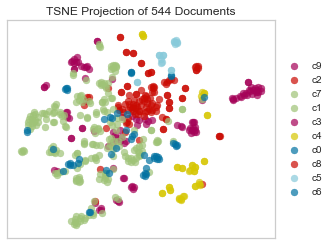

In [35]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix, ["c{}".format(c) for c in km.labels_])
tsne.poof()



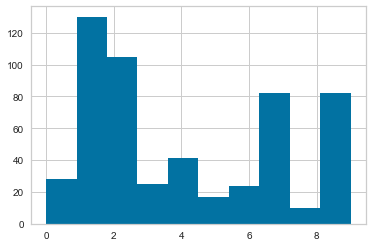

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(km.labels_, bins=k)
plt.show()

In [70]:
import gensim
from gensim import corpora, models
import pyLDAvis.gensim

import nltk
from nltk.tokenize import WhitespaceTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string # allows us to define punctutation to remove
from nltk.corpus import wordnet as wn # allows us to access pos types
from nltk.corpus import PlaintextCorpusReader # to read documents

porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# Tokenize text string by word
def splitToWords(text):
    return WhitespaceTokenizer().tokenize(text)

# Tokenize text string by sentence
def splitToSentences(text):
    return sent_tokenize(text)

# change words to lowercase in a list
def convertToLowercase(text):
    return [word.lower() for word in text]

# remove punctuation from the string
def removePunctuation(text):
    exclude = set(string.punctuation)
    keep_these_punct = ['%']
    for punct in keep_these_punct:
        exclude.remove(punct)
    converted_text = ''.join(ch for ch in text if ch not in exclude)
    return converted_text

# Apply stemming to words in a list
def stemWords(words):
    return [porter_stemmer.stem(word) for word in words]

# Apply lemmatization to words in a list
def lemmatizeWords(words):
    convert_words = []
    words_with_pos = nltk.pos_tag(words)
    for pos_tag in words_with_pos:
        simplify_pos = penn_to_wn(pos_tag[1])
        if(simplify_pos == None):
            convert_words.append(wordnet_lemmatizer.lemmatize(pos_tag[0]))
        else:
            convert_words.append(wordnet_lemmatizer.lemmatize(pos_tag[0], simplify_pos))
    #print(words == convert_words)
    return convert_words

# Apply part of speech tagging to a list of words
def partOfSpeechTag(words):
    return nltk.pos_tag(words)


stopset = set(nltk.corpus.stopwords.words('english'))
extra_stopwords = ["like", "it’s", "uh", "going", "that’s", "think", "actually", "kind", "…", "know", "come", "u", "really"]
for word in extra_stopwords:
    stopset.add(word)

# removes stop words from a list of words
def removeStopWords(text):
    return [word for word in text if word not in stopset]

# checks if a word isnt in the stopset
def notStopWord(word):
    return word not in stopset


## the following functions check what a tag is
def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']


def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']


def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']


def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']


def penn_to_wn(tag):
    if is_adjective(tag):
        return wn.ADJ
    elif is_noun(tag):
        return wn.NOUN
    elif is_adverb(tag):
        return wn.ADV
    elif is_verb(tag):
        return wn.VERB
    return None

# takes in list of words, returns list of bigrams
def create_ngrams(sentence, n):
    if(n == 1):
        return splitToWords(sentence)
    if(n == 2):
        return list(nltk.bigrams(sentence))
    if(n == 3):
        return list(nltk.trigrams(sentence))
    else:
        print("ngram length not supported as of now")
        return sentence


def read_corpus(corpus_root):
    corpus = PlaintextCorpusReader(corpus_root, '.*')

    corpus_titles = []
    corpus_docs = []

    for titles in corpus.fileids():
        corpus_titles.append(titles)
        corpus_docs.append(corpus.raw(titles))

    return corpus_docs



In [87]:
corpus_sentences = [splitToSentences(x) for x in corpus]
corpus_words = []
for x in corpus_sentences:
    corpus_words.append(([convertToLowercase(lemmatizeWords(splitToWords(removePunctuation(y)))) for y in x]))
#corpus_words = [removeStopWords(WhitespaceTokenizer().tokenize(x)) for x in corpus]

In [91]:
final_corpus = []
for x in corpus_words:
    final_corpus.append([item for sublist in x for item in removeStopWords(sublist)])
final_corpus[0]

['huntington',
 'west',
 'virginia',
 'cnn',
 'light',
 'bulb',
 'go',
 'sen',
 'joe',
 'manchins',
 'head',
 'get',
 'monte',
 'say',
 'yes',
 'dress',
 'monte',
 'whats',
 'last',
 'name',
 'democratic',
 'senator',
 'spun',
 'around',
 'smile',
 'look',
 'everyone',
 'nearby',
 'hes',
 'west',
 'virginia',
 'boy',
 'manchin',
 'tour',
 'job',
 'fair',
 'host',
 'office',
 'last',
 'week',
 'meet',
 'director',
 'west',
 'virginias',
 'affiliate',
 'dress',
 'success',
 'organization',
 'help',
 'provide',
 'professional',
 'clothes',
 'woman',
 'hed',
 'others',
 'fair',
 'democratic',
 'senator',
 'try',
 'someone',
 'could',
 'help',
 'publicize',
 'cause',
 'hes',
 'say',
 'yes',
 'dress',
 'manchin',
 'repeat',
 'still',
 'search',
 'last',
 'name',
 'celebrity',
 'bridal',
 'consultant',
 'tlc',
 'reality',
 'show',
 'minutes',
 'later',
 'staffer',
 'look',
 'phone',
 'answer',
 'durham',
 'say',
 'montes',
 'last',
 'name',
 'durham',
 '17th',
 'job',
 'fair',
 'manchins',
 '

In [92]:
import time
start_time = time.time()


dictionary = corpora.Dictionary(final_corpus)

# Converts dictionary into a bag-of-words.
corpusVec = [dictionary.doc2bow(text) for text in final_corpus]

# Generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpusVec, num_topics=10, id2word = dictionary, passes=500)
# print(ldamodel.print_topics(num_topics=5, num_words=5))

vis_data = pyLDAvis.gensim.prepare(ldamodel, corpusVec, dictionary)

pyLDAvis.save_html(vis_data, 'lda.html')
print("--- %s seconds ---" % (time.time() - start_time))

/Users/sarahmathew/Envs/capstone/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


--- 1088.274130821228 seconds ---
